# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
 # leer conjuntos de datos en los DataFrames
df_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_products = pd.read_csv('/datasets/products.csv', sep=';')
df_aisles = pd.read_csv('/datasets/aisles.csv',sep=';')
df_departments = pd.read_csv('/datasets/departments.csv',sep=';') 
df_order_products= pd.read_csv('/datasets/order_products.csv',sep=';')

In [3]:
df_orders.info(show_counts=True )
print()
print(df_orders.head())# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12  

In [4]:
# mostrar información del DataFrame
df_products.info(show_counts=True )
print()
print(df_products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


In [5]:
# mostrar información del DataFrame
df_aisles.info(show_counts=True )
print()
print(df_aisles.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [6]:
# mostrar información del DataFrame
df_departments.info(show_counts=True ) 
print()
print(df_departments.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


In [7]:
# mostrar información del DataFrame
df_order_products.info(show_counts=True )
print()
print(df_order_products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Se debe de mostrar las primeras filas para asi por ver si cuentan con un formato adecuado  o aplicar un formato y asi tener un data frame limpio 


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print(df_orders.duplicated().value_counts())      
#print(df_orders.head()) 
print(df_orders.max())
print(df_orders.min())
print(df_orders.median())


False    478952
True         15
dtype: int64
order_id                  3421079.0
user_id                    206209.0
order_number                  100.0
order_dow                       6.0
order_hour_of_day              23.0
days_since_prior_order         30.0
dtype: float64
order_id                  4.0
user_id                   2.0
order_number              1.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64
order_id                  1709522.0
user_id                    102633.0
order_number                   11.0
order_dow                       3.0
order_hour_of_day              13.0
days_since_prior_order          7.0
dtype: float64


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

si se tienen líneas duplicadas lo que no indica que por alguna anomalia se repitio el pedido el mismo dia y hora  

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
pedidos = df_orders[(df_orders['order_dow']==3)&(df_orders['order_hour_of_day']== 2)]
print(pedidos)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?

Que el dia miercoles se realizaron multiples pedidos a la misma hora 

In [10]:
# Elimina los pedidos duplicados
df_orders = df_orders.drop_duplicates().reset_index(drop=True)


In [11]:
# Vuelve a verificar si hay filas duplicadas
print(df_orders.duplicated().value_counts())


False    478952
dtype: int64


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidosorder
order_filas = df_orders['user_id'].duplicated().value_counts()
print(order_filas)

True     321515
False    157437
Name: user_id, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos

si existen IDs duplicados, es normal debido a los usuarios pueden ordenar la veces  que deseen por ende puede aparecer multiples veces.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print(df_products.duplicated().value_counts())



False    49694
dtype: int64


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
department_id = df_products['product_id'].duplicated().value_counts()
print(department_id)



False    49694
Name: product_id, dtype: int64


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name'] = df_products['product_name'].str.upper()
print(df_products['product_name'].value_counts())


GREEN TEA WITH GINSENG AND HONEY           3
MEGAFLORA PROBIOTIC                        2
ULTRAGEL PERSONAL LUBRICANT                2
MOUNTAIN BERRY BLAST SPORTS DRINK          2
BIOTIN 1000 MCG                            2
                                          ..
FRESH BONELESS SKINLESS CHICKEN BREASTS    1
ORGANIC BLACKBERRY FRUIT SPREAD            1
REDUCED FAT CREAMY PEANUT BUTTER           1
EVERY MAN'S ONE DAILY MULTIVITAMIN         1
ANTI-BREAKAGE SHAMPOO                      1
Name: product_name, Length: 48332, dtype: int64


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes

print(df_products['product_name'].duplicated().value_counts())

False    48333
True      1361
Name: product_name, dtype: int64


In [1]:
# se eliminaron los 
df_products = df_products.drop_duplicates().reset_index(drop=True)
print(df_products['product_name'].duplicated().value_counts())
print(df_products[(df_products['product_name'].duplicated()) & (~df_products['product_name'].isna())] )
print(df_products[~(df_products['product_name'].isna())])

IndentationError: unexpected indent (410853018.py, line 5)

Describe brevemente tus hallazgos y lo que hiciste con ellos.

se encontro productos  duplicados  no se eliminan los datos debidos que los datos duplicados son valores ausentes. 

### `departments` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas
print(df_departments.duplicated().value_counts())


False    21
dtype: int64


In [19]:
 # Revisa únicamente si hay IDs duplicadas de productos
duplicated_id = df_departments['department_id'].duplicated().value_counts()
print(duplicated_id)

False    21
Name: department_id, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.
No se encotraron valores ausentes ni duplicados esta tabla esta lista para trabajar con ella

### `aisles` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
#df_aisles.info()
print(df_aisles.duplicated().value_counts(dropna=False))

False    134
dtype: int64


In [21]:
# Revisa únicamente si hay IDs duplicadas de productos
aisles_id = df_aisles['aisle_id'].duplicated().value_counts()
print(aisles_id)

False    134
Name: aisle_id, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No existen valores duplicados ni ausentes el data frame esta listo para trabajar con el 

### `order_products` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
print(df_order_products.duplicated().value_counts())


False    4545007
dtype: int64


In [23]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
df_order_products = df_order_products.drop_duplicates().reset_index(drop= True)
print(df_order_products['add_to_cart_order'].duplicated().value_counts())



True     4544942
False         65
Name: add_to_cart_order, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se econtraros valores duplicados pero es normal debido pueder esistr multimples pedidos con la misma secuencia en la que añadio la compra, se intento borrar pero no se realizo ningun cambio ya que el comando no detecto valores duplicados 


## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [24]:
# Encuentra los valores ausentes en la columna 'product_name'

print(df_products['product_name'].isna().sum())

1258


Describe brevemente cuáles son tus hallazgos.

se encotraron 1258 valosres ausentes en la columan product_name

In [25]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(df_products[(df_products['product_name'].isna()) & (df_products['aisle_id']== 100)])


       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

todos los nombres con valores ausentes pertenecen a un mismo categoria de pasillo donde vive 

In [26]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(df_products[(df_products['product_name'].isna()) & (df_products['department_id']== 21)])


       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

si todos los valores ausentes pertenecin el mismo departamento de viveres

In [27]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
df_id= df_products[(df_products['aisle_id'].isna() & df_products['department_id'].isna())]
print(df_id)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Describe brevemente cuáles son tus hallazgos.

el filtrado esta vacio esto indica que no hay filas aisles_ id y deparment_id tengan valores ausentes 

In [28]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna(value='Unknown')
#Comprobando valores ausentes 
print('validando que el valor ausente sea  ', df_products['product_name'].isna().sum())


validando que el valor ausente sea   0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se encontraron valores ausenten por tal motivo se realizo el remplazo por Unknown posterior a ellos se realizar una consulta para validar que los valores ausentes no existan.

### `orders` data frame

In [29]:
# Encuentra los valores ausentes
print('valores ausentes en  df_orders ', df_orders.isna().sum())


valores ausentes en  df_orders  order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [30]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

prior_order = df_orders['days_since_prior_order'].median()
df_orders['days_since_prior_order'] = df_orders['days_since_prior_order'].fillna(prior_order)


In [31]:
print(df_orders.isna().sum())

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

se realizo un consulta con isna, solo la columna days_since_prior_order arroja, se nota que son valores  ausentes cuantitativos y  para tener lectura de los datos , remplazan los valores ausentes  por la mediana, una vez realizado los cambios verificamos sque no exitan valores ausentes    

### `order_products` data frame

In [32]:
# Encuentra los valores ausentes
df_order_products.info(show_counts=True)
print(df_order_products.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [33]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print('los valores minimos son: ')
print(df_order_products['add_to_cart_order'].min())
print('los valores maximos son: ')
print(df_order_products['add_to_cart_order'].max())

los valores minimos son: 
1.0
los valores maximos son: 
64.0


Describe brevemente cuáles son tus hallazgos.

In [34]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
absent_id = df_order_products[(~df_order_products['order_id'].isna() )& (df_order_products['add_to_cart_order'].isna())]
absent_ids = absent_id['order_id']
print(absent_ids)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [35]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
print(absent_id['order_id'].value_counts(dropna=False))
#Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
print()
print(absent_id['product_id'].value_counts())
print()
print('El valor minimo product_id es :',absent_id['product_id'].value_counts().min())

61355      63
3308010    51
2136777    44
171934     40
1959075    34
           ..
2652650     1
2729254     1
2621907     1
888470      1
1677118     1
Name: order_id, Length: 70, dtype: int64

27555    4
21137    4
40709    4
11193    4
24852    4
        ..
12545    1
365      1
40278    1
21125    1
8324     1
Name: product_id, Length: 720, dtype: int64

El valor minimo product_id es : 1


Describe brevemente cuáles son tus hallazgos.

los pedidos con valores ausentes no tienen 64 productos, solo llegan a aun valor maximo de 63 y un valor minimo de 1  
los 'product_id' tiene un valor maximo de 4 porductos por pedio y el minimo de producto  es 1 

In [36]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

#cambio de valores ausentes a 999
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999)
#Comprobar cambio a  tipo "int"
convert =  np.array_equal(df_order_products['add_to_cart_order'],
                          df_order_products['add_to_cart_order'].astype('int'))
print('Se puede convertir la columna a  tipo int: ',convert)
print()
#Cambio a tipo "int"
df_order_products['add_to_cart_order'] =  df_order_products['add_to_cart_order'].astype('int')
#comprobacion 
print( df_order_products.info())

Se puede convertir la columna a  tipo int:  True

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB
None


Describe brevemente tus hallazgos y lo que hiciste con ellos.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Es importante realizar la limpieza adecuada de los diferentes tipos de data frame, y saber interprestar los datos para aplicar un correcto  tratamiento  valores ausentes y saber si es correcto e eliminar los valores duplicados o se quedan 

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [37]:
print("El valor minimo de la columna 'order_hour_of_day'  es:",df_orders['order_hour_of_day'].min())
print("El valor maximo de la columna 'order_hour_of_day'  es: ",df_orders['order_hour_of_day'].max())

El valor minimo de la columna 'order_hour_of_day'  es: 0
El valor maximo de la columna 'order_hour_of_day'  es:  23


In [38]:
print("El valor minimo de la columna 'order_dow'  es:",df_orders['order_dow'].min())
print("El valor maximo de la columna 'order_dow'  es: ",df_orders['order_dow'].max())

El valor minimo de la columna 'order_dow'  es: 0
El valor maximo de la columna 'order_dow'  es:  6


Escribe aquí tus conclusiones

esto nos ayuda para visualizar en que rango se podra visualiar las grafias y si los valores son los adecuados 

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

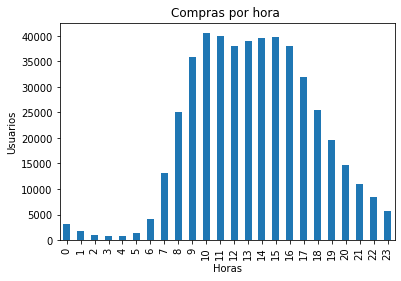

In [39]:
row = df_orders.groupby('order_hour_of_day')['order_dow'].count()
row.plot(x='order_hour_of_day',
          kind= 'bar',
          title='Compras por hora ',
          xlabel='Horas',
          ylabel='Usuarios')

plt.show()

Escribe aquí tus conclusiones

entre las 9 am y 4 pm se genere mayor numero de compras 

### [A3] ¿Qué día de la semana compran víveres las personas?

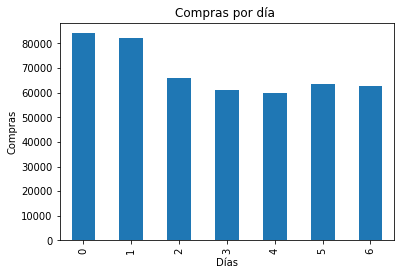

In [40]:
row1 = df_orders.groupby('order_dow')['order_hour_of_day'].count()

row1.plot(x='order_dow',
          kind= 'bar',
          title='Compras por día ',
          xlabel='Días',
          ylabel='Compras')

plt.show()

Escribe aquí tus conclusiones

se obsera que el dia en que los usuarios realizan mayar compra de viveres el el día domingo 

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

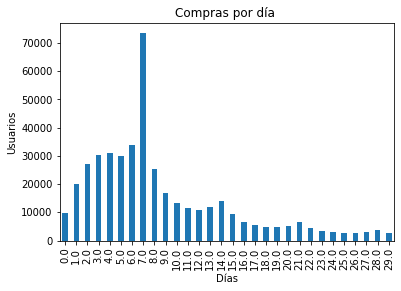

In [41]:
order_last = df_orders[~(df_orders['days_since_prior_order'] == 30)]
order_last = order_last.groupby('days_since_prior_order')['order_dow'].count()

order_last.plot(x='order_dow',
          kind= 'bar',
          title='Compras por día ',
          xlabel='Días',
          ylabel='Usuarios',
         xlim=[0,30])

plt.show()



In [42]:
print("El valor maximo de la columna 'days_since_prior_order'  es: ",df_orders['days_since_prior_order'].min())
print("El valor maximo de la columna 'days_since_prior_order'  es: ",df_orders['days_since_prior_order'].max())

El valor maximo de la columna 'days_since_prior_order'  es:  0.0
El valor maximo de la columna 'days_since_prior_order'  es:  30.0


Escribe aquí tus conclusiones

De acuderdo a la graficas y el minimos de dias que las personas tardan para realizar un nuevo pedido es de 0 dias y el maximo es de 30 dias y la mayoria de las personas realizan pedidos cada 7 dias 

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

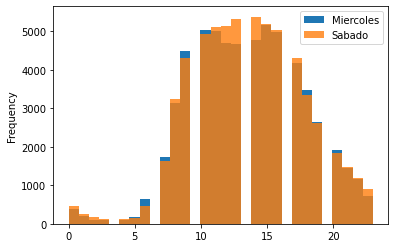

In [43]:
# datos de miercoles 
df_orders[df_orders['order_dow'] == 3]['order_hour_of_day'].plot(kind='hist', bins=30)
#datos de sabado
df_orders[df_orders['order_dow'] == 6]['order_hour_of_day'].plot(kind='hist', bins=30, alpha=0.8)

plt.legend(['Miercoles', 'Sabado'])
plt.show()


Escribe aquí tus conclusiones

se obserava que los días son muy silimales en la hora de poca y mucha demanda aunque se se ve una diferencia notables el dia sabado a entre las 10  y las 15 horas del día

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

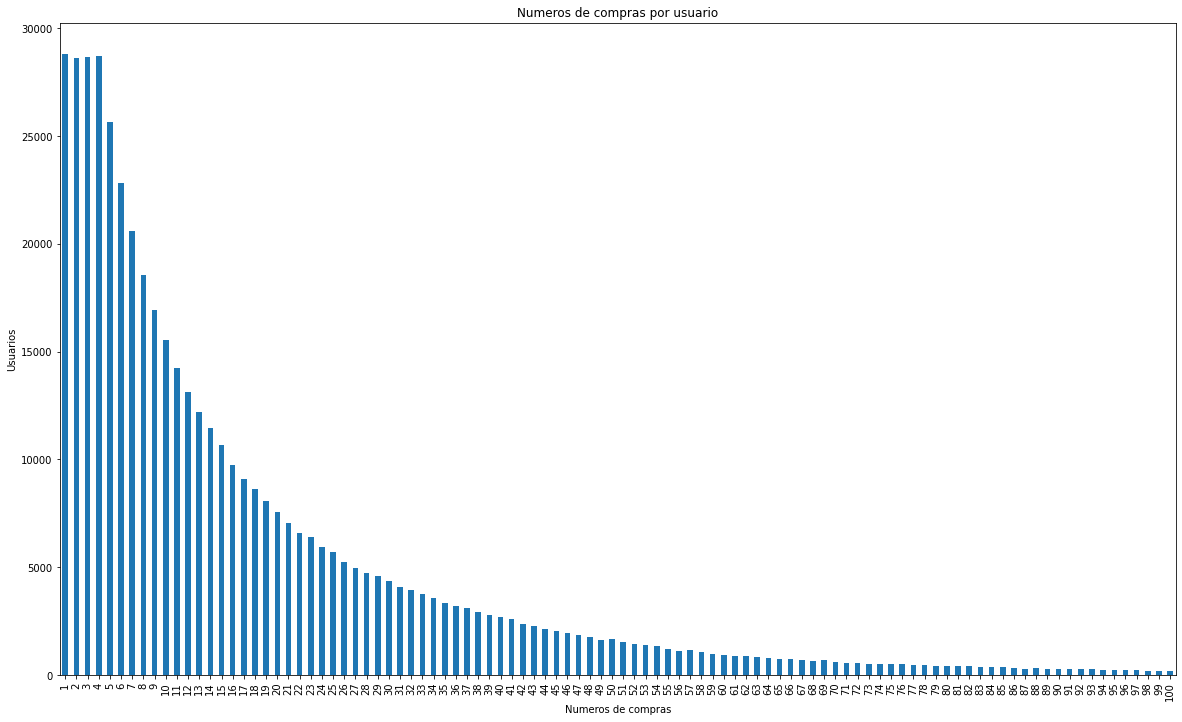

In [44]:
order_count= df_orders['order_number'].value_counts().sort_index()

order_count.plot(figsize=(20, 12),
                 x='order_number',
                 kind= 'bar',
                 title='Numeros de compras por usuario',
                 xlabel='Numeros de compras',
                 ylabel='Usuarios',
                 rot = 90)


plt.show()



Escribe aquí tus conclusiones

Se aprecia que la mayoria de los usuarios realizan entre 1 y 4 pedidos, despues los pedidos van disminuyendo  

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

                product_name  product_id  numero_de_veces_pedido
0                     BANANA       24852                   66050
1     BAG OF ORGANIC BANANAS       13176                   53297
2       ORGANIC STRAWBERRIES       21137                   37039
3       ORGANIC BABY SPINACH       21903                   33971
4       ORGANIC HASS AVOCADO       47209                   29773
5            ORGANIC AVOCADO       47766                   24689
6                LARGE LEMON       47626                   21495
7               STRAWBERRIES       16797                   20018
8                      LIMES       26209                   19690
9         ORGANIC WHOLE MILK       27845                   19600
10       ORGANIC RASPBERRIES       27966                   19197
11      ORGANIC YELLOW ONION       22935                   15898
12            ORGANIC GARLIC       24964                   15292
13          ORGANIC ZUCCHINI       45007                   14584
14       ORGANIC BLUEBERR

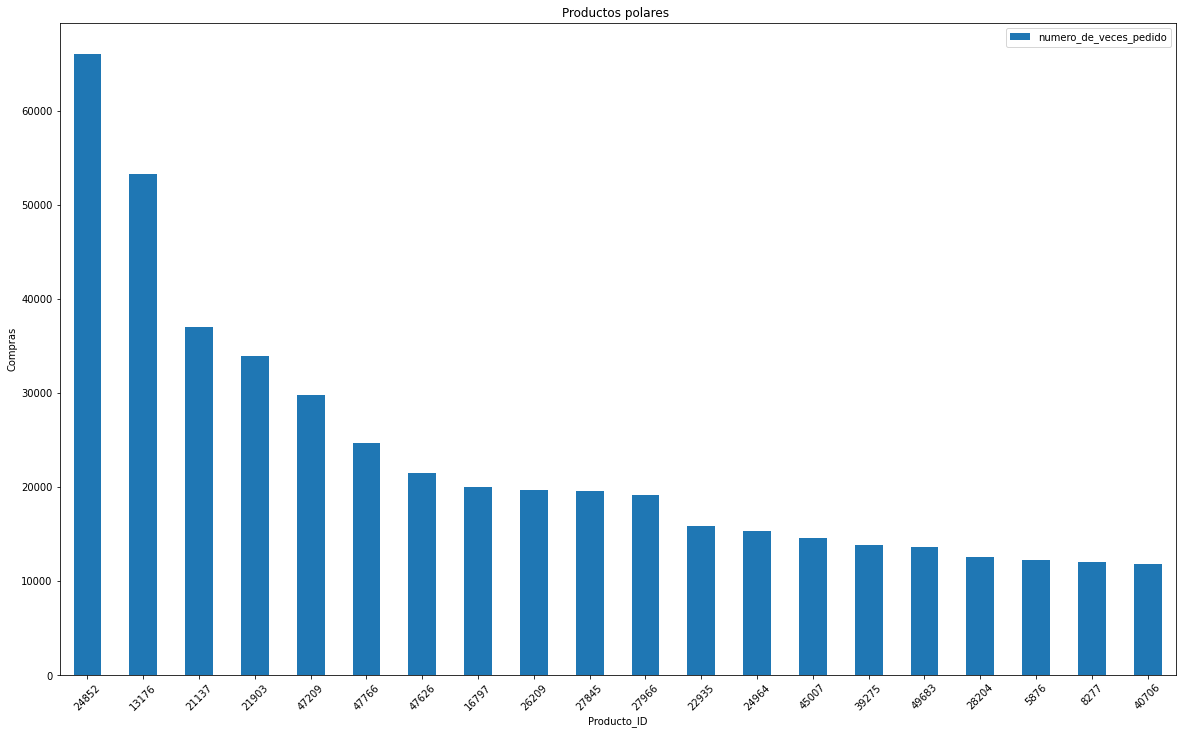

In [45]:
#Combinacion data frame, union izquierda 
product_n = df_order_products.merge(df_products, on='product_id',how='left')

#agrupacion por nombre e id de producto
product_n = (product_n.groupby(['product_name'
                                ,'product_id'])['order_id'].count()).sort_values(ascending=False).reset_index(name='numero_de_veces_pedido')    
print(product_n.head(20))

product_n = product_n.iloc[:20]

product_n.plot(figsize=[20,12],
               x='product_id',
               kind= 'bar',
               title='Productos polares ',
               xlabel='Producto_ID',
               ylabel='Compras',
               rot = 45)

plt.show()


Escribe aquí tus conclusiones

se observa que los productos organicos son los mas pedidos 

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

El numero de articulos que normalmente compran las personas en un pedido es  8.0
order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64


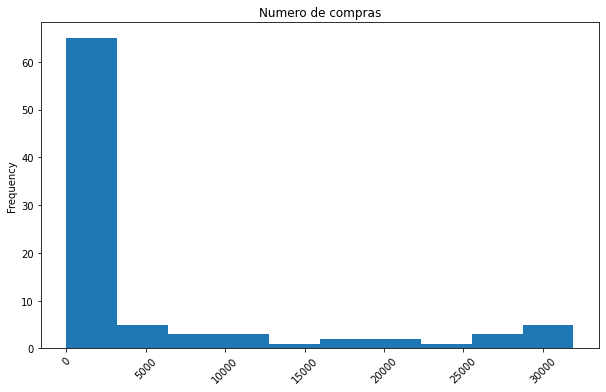

In [46]:

compra = df_order_products.merge(df_products, on='product_id',how='left')

#print(compra.head())
compra = compra.groupby('order_id')['product_id'].count() 
print('El numero de articulos que normalmente compran las personas en un pedido es ',compra.median())
print(compra)
 
compra = compra.value_counts()

#print(compra)


compra.plot(x='order_id',
            figsize=[10, 6],
            kind='hist',
            title='Numero de compras',
            rot = 45)
    
plt.show()


Escribe aquí tus conclusiones

las personal normamente realilzan una compra  8 productos en promedio.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [47]:
#Combinacion data frame, union izquierda
df_art_frec = df_order_products.merge(df_products, on='product_id',how='left')
df_art_frec = df_art_frec[(df_art_frec['reordered'] == 1)]

#agrupacion por nombre e id de producto
df_art_frec = (df_art_frec.groupby(['product_name','product_id'])['order_id'].count()).sort_values(ascending=False).reset_index(name='numero_de_veces_pedido')
print(df_art_frec.head(20))

                product_name  product_id  numero_de_veces_pedido
0                     BANANA       24852                   55763
1     BAG OF ORGANIC BANANAS       13176                   44450
2       ORGANIC STRAWBERRIES       21137                   28639
3       ORGANIC BABY SPINACH       21903                   26233
4       ORGANIC HASS AVOCADO       47209                   23629
5            ORGANIC AVOCADO       47766                   18743
6         ORGANIC WHOLE MILK       27845                   16251
7                LARGE LEMON       47626                   15044
8        ORGANIC RASPBERRIES       27966                   14748
9               STRAWBERRIES       16797                   13945
10                     LIMES       26209                   13327
11      ORGANIC YELLOW ONION       22935                   11145
12            ORGANIC GARLIC       24964                   10411
13          ORGANIC ZUCCHINI       45007                   10076
14            CUCUMBER KI

Escribe aquí tus conclusiones

Los 20 articulos que con mayor frecuencia son muy similares a los 20 articulos mas vendidos                                

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?

In [48]:
#Calcula el numero de veces reordenadas un producto
product_reorder = df_order_products.groupby('product_id')['reordered'].sum()

# Calcula el total de veces que se pide cada producto
product_total = df_order_products.groupby('product_id')['order_id'].count()

# Calcula la proporción
product_proportion = (product_reorder / product_total)

# Muestra la proporción por producto
print(product_proportion)

print(product_reorder.corr(product_total))

product_id
1        0.564286
2        0.000000
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Length: 45573, dtype: float64
0.991533558157125


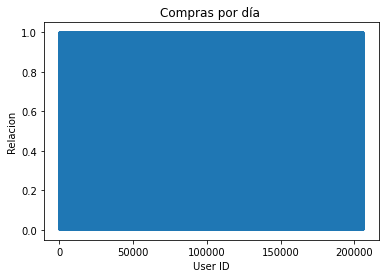

In [55]:
#grafica de correlacion de compra y pedido
product_proportion.plot(
           
          title='Compras por día ',
          xlabel='User ID',
          ylabel='Relacion')


plt.show()

Escribe aquí tus conclusiones

El producto que es recuerrente se adquiere se vuelve a pedir se encuetra una correlacion positiva

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Length: 149626, dtype: float64


<AxesSubplot:xlabel='user_id'>

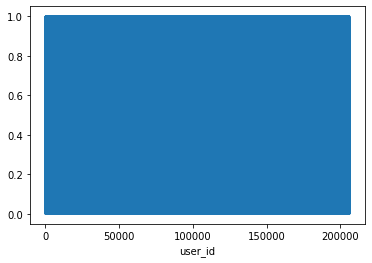

In [54]:
df_ord_user = df_order_products.merge(df_orders, on='order_id',how='left')

#Calcula el numero de veces que cliente  reordena un producto
product_reorder = df_ord_user.groupby('user_id')['reordered'].sum()

# Calcula el total de veces el usuario a hecho una orden 
product_total = df_ord_user.groupby('user_id')['order_id'].count()

# Calcula la proporción
product_proportion = product_reorder / product_total

# Muestra la proporción por producto
print(product_proportion)

#grafica de productos y relacion de compra
product_proportion.plot(
           
          title='proporcion de pedidos',
          xlabel='User ID',
          ylabel='relacion ')


plt.show()

In [ ]:
qué proporción de sus productos ya los había pedido es laEl producto que es recuerrente se adquiere se vuelve a pedir se encuetra una correlacion positiva

Escribe aquí tus conclusiones

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [51]:
df_add = df_order_products.merge(df_products, on='product_id',how='left')
#print(df_add.head())

#filtrar primer pedido
df_add= df_add[(df_add['add_to_cart_order'] == 1)]

df_add = (df_add.groupby(['add_to_cart_order',
                                    'product_name'])['order_id'].count()).sort_values(ascending=False).reset_index(name='numero_de_veces_pedido')
#.sort_values(ascending=False)

print(df_add.head(20))


    add_to_cart_order                 product_name  numero_de_veces_pedido
0                   1                       BANANA                   15562
1                   1       BAG OF ORGANIC BANANAS                   11026
2                   1           ORGANIC WHOLE MILK                    4363
3                   1         ORGANIC STRAWBERRIES                    3946
4                   1         ORGANIC HASS AVOCADO                    3390
5                   1         ORGANIC BABY SPINACH                    3336
6                   1              ORGANIC AVOCADO                    3044
7                   1                 SPRING WATER                    2336
8                   1                 STRAWBERRIES                    2308
9                   1          ORGANIC RASPBERRIES                    2024
10                  1   SPARKLING WATER GRAPEFRUIT                    1914
11                  1          ORGANIC HALF & HALF                    1797
12                  1    

Escribe aquí tus conclusiones

los productos que normamente agregan primero son de organicos relacionados con frutas y verduras 

### Conclusion general del proyecto:

En la primer parte se realizo un analisis de los datos para revisar y analisar con que tipos de datos trataremos. 
En la segunda parte se reviso, se trato los datos duplicados revisando si seria adecuado realizar la eliminacion de datos duplicados, se llego a la conlusion que algunos datos seria necesario eliminar y otros conservarlos, en la parte de asuentes se reviso que tipos se cambiaran por valores que ayudaran con el analisis y eliminarlo  ausentes  el  agrupar de manera correcto los datos  mostrarn una informacion mas adetalle esto nos sirve para generar grafias para  hacer un analisis mas visual y practico   